In [5]:
from lib_realization import *

## В данной пункте лабораторной работы реализованно:
1. Использовать методы библиотеки `scipy.optimize`: `Newton-CG`, `BFGS`, `L-BFGS-B`.
2. Применить методы к ряду тестовых функций: Rosenbrock, Himmelblau, Quadratic.
3. Проанализировать эффективность методов по числу итераций, числу вызовов функции и градиента.
4. Выполнить визуализацию траекторий оптимизации и сформулировать выводы.

---

### Описание используемых методов

#### Newton-CG
- Метод из библиотеки `scipy.optimize.minimize`.
- Используется аналитический градиент, гессиан вычисляется численно (или через `hessp`).
- Гиперпараметры: `gtol` в `options`.

#### BFGS
- Квазиньютоновский метод, не требует гессиана.
- Использует аппроксимацию обратного гессиана.
- Гиперпараметры: `gtol`.

#### L-BFGS-B
- Ограниченная версия BFGS.
- Более эффективен при большом числе параметров.
- Гиперпараметры: `gtol`.

---

## Протестировано на следующих функциях:
- `quadratic(x) = x0^2 + x1^2`
- `rosenbrock(x) = 100*(x1 - x0^2)^2 + (1 - x0)^2`
- `himmelblau(x)` — классическая функция с несколькими минимумами.


 Optimization terminated successfully.
         Current function value: 0.0
         Iterations: 2
         Function evaluations: 2
         Time elapsed: 0.0006 sec
Newton-CG: x' = [0. 0.], f(x') = 0.0, iterations = 2


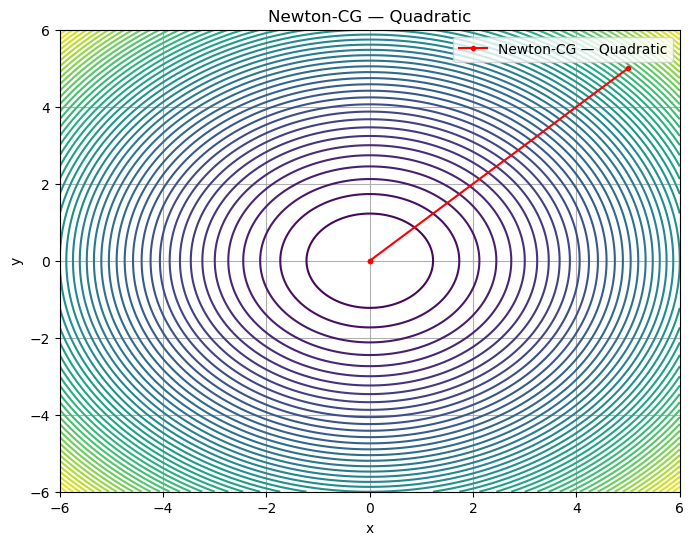

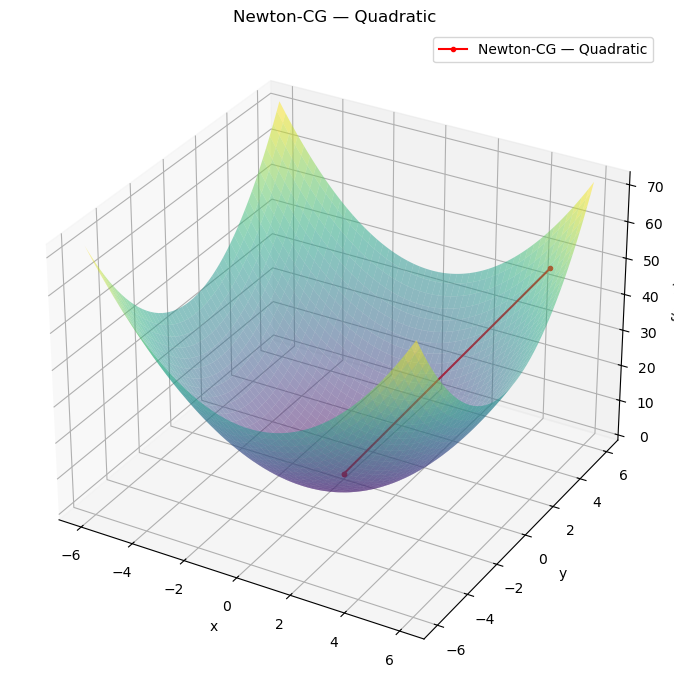

 Optimization terminated successfully.
         Current function value: 0.0
         Iterations: 3
         Function evaluations: 4
         Time elapsed: 0.0007 sec
BFGS: x' = [0. 0.], f(x') = 0.0, iterations = 3


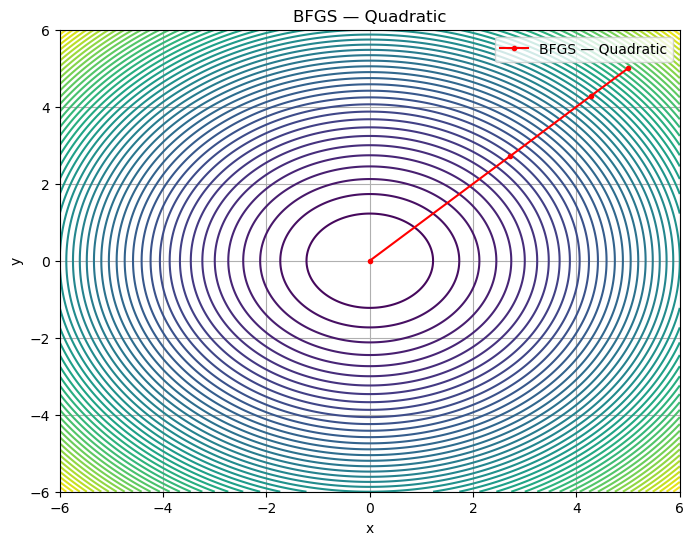

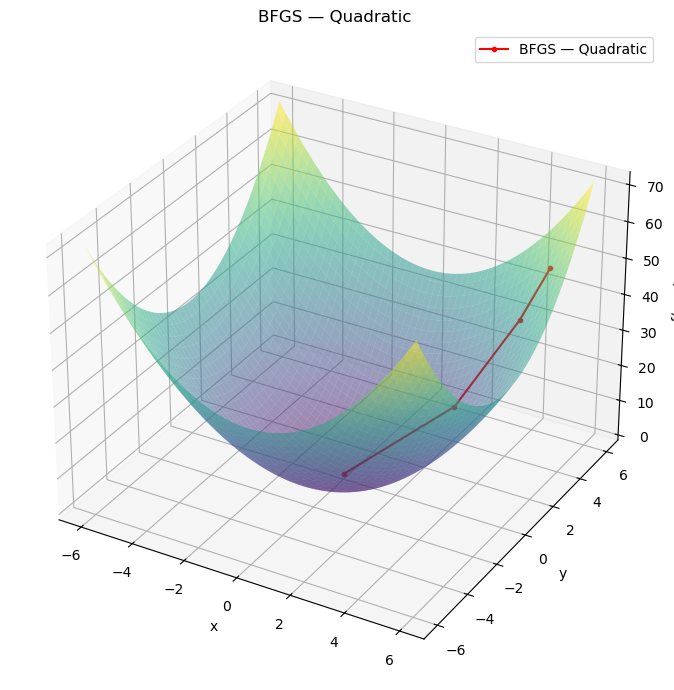

 Optimization terminated successfully.
         Current function value: 7.730836871165916e-29
         Iterations: 2
         Function evaluations: 3
         Time elapsed: 0.0003 sec
L-BFGS-B: x' = [6.21724894e-15 6.21724894e-15], f(x') = 7.730836871165916e-29, iterations = 2


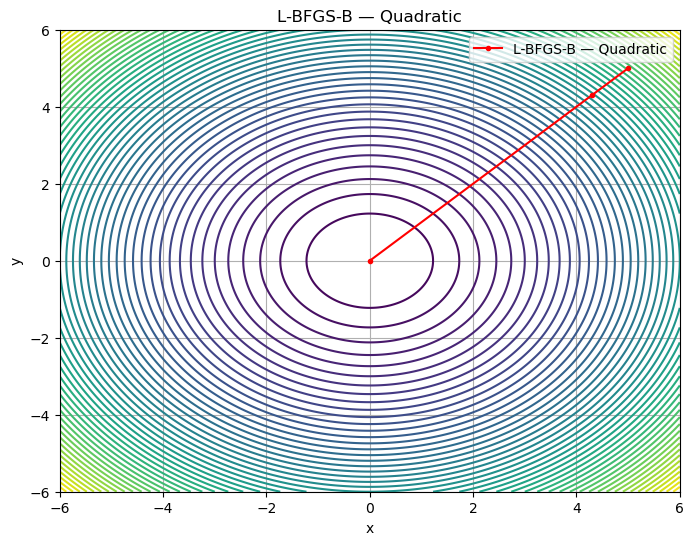

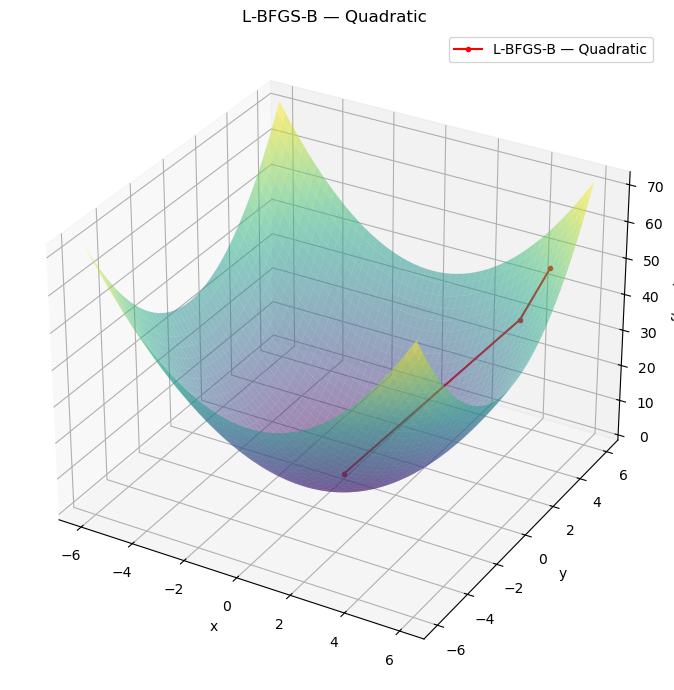

In [6]:
run_newton_cg(quadratic, grad_quadratic, x0=[5.0, 5.0], func_label="Quadratic")
run_bfgs(quadratic, grad_quadratic, x0=[5.0, 5.0], func_label="Quadratic")
run_lbfgsb(quadratic, grad_quadratic, x0=[5.0, 5.0], func_label="Quadratic")

 Optimization terminated successfully.
         Current function value: 8.513892977910826e-15
         Iterations: 277
         Function evaluations: 300
         Time elapsed: 0.0416 sec
Newton-CG: x' = [0.99999991 0.99999982], f(x') = 8.513892977910826e-15, iterations = 277


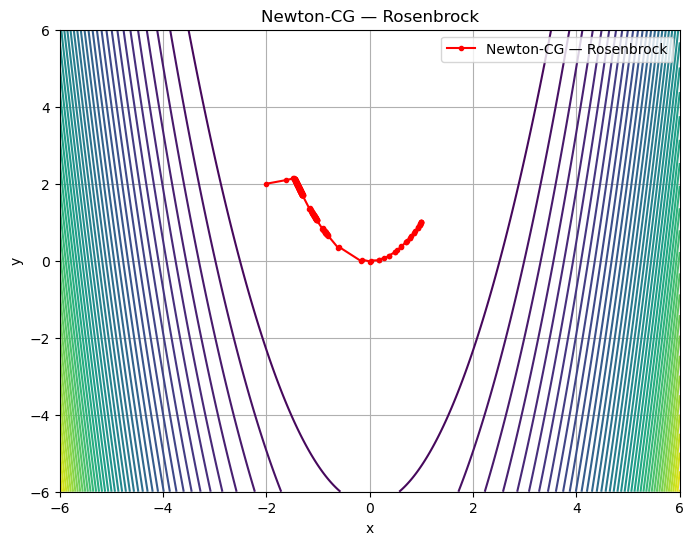

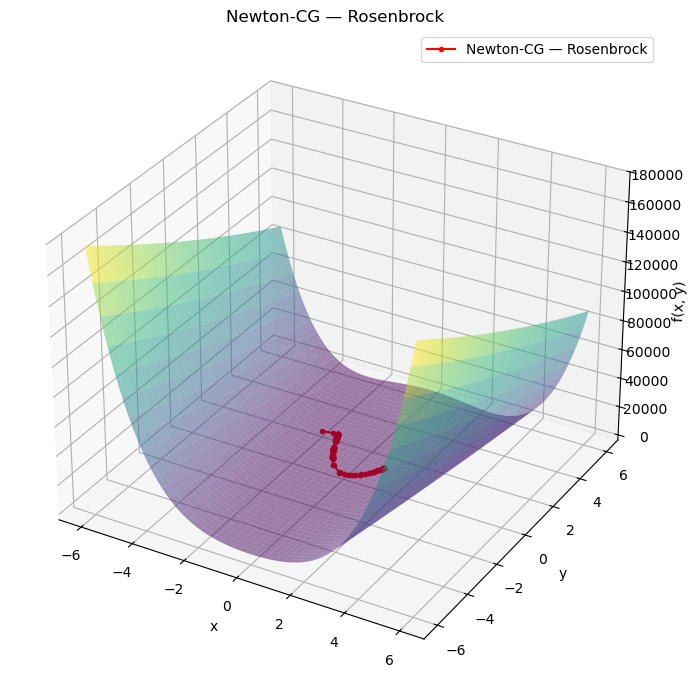

 Optimization terminated successfully.
         Current function value: 2.238415525136917e-21
         Iterations: 37
         Function evaluations: 44
         Time elapsed: 0.0063 sec
BFGS: x' = [1. 1.], f(x') = 2.238415525136917e-21, iterations = 37


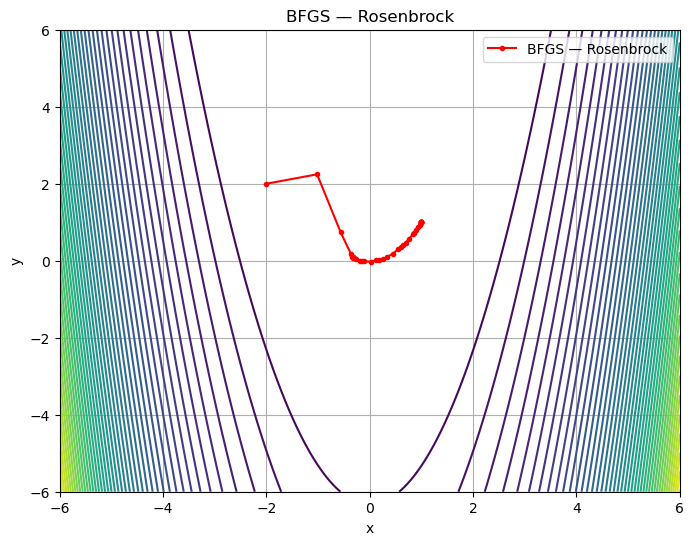

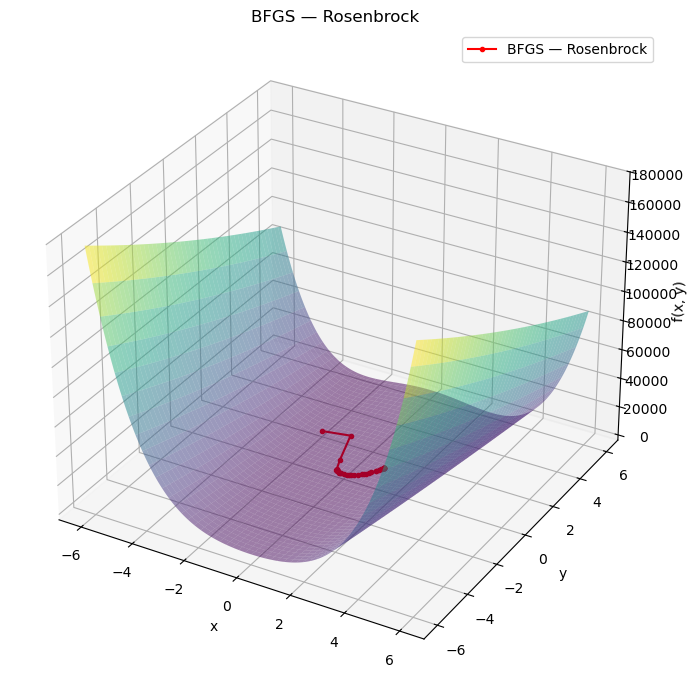

 Optimization terminated successfully.
         Current function value: 1.210823963941413e-17
         Iterations: 39
         Function evaluations: 53
         Time elapsed: 0.0014 sec
L-BFGS-B: x' = [1.         0.99999999], f(x') = 1.210823963941413e-17, iterations = 39


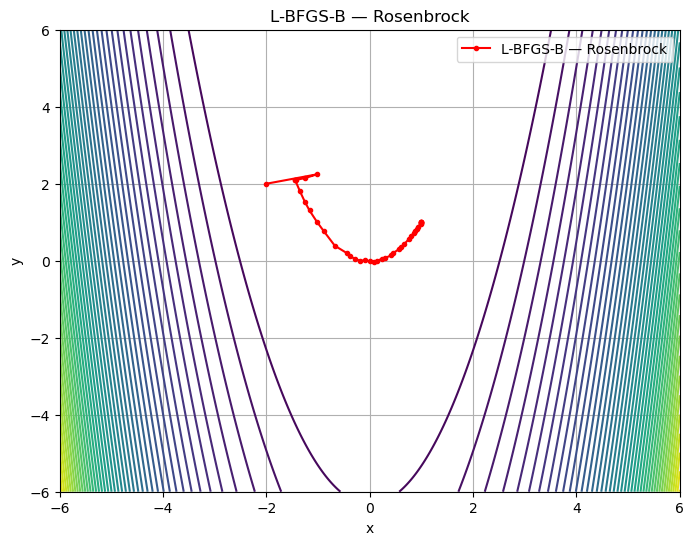

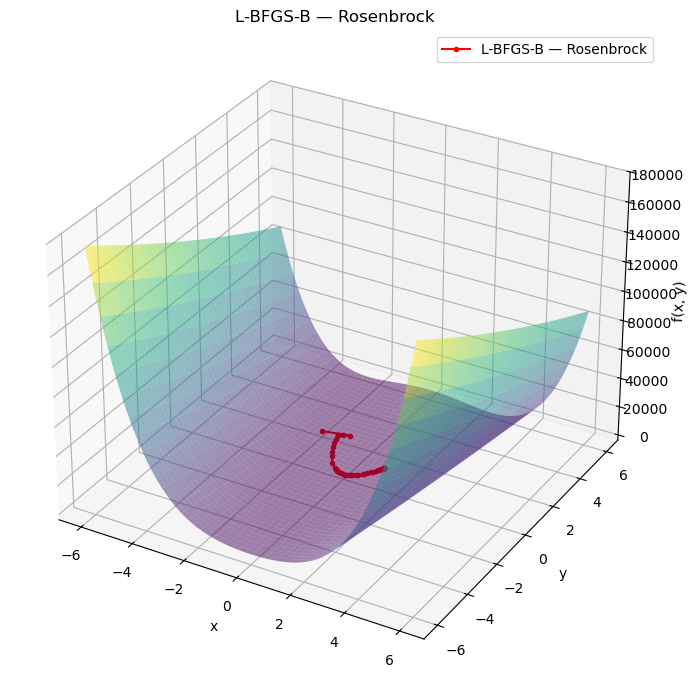

In [7]:
run_newton_cg(rosenbrock, grad_rosenbrock, x0=[-2.0, 2.0], func_label="Rosenbrock")
run_bfgs(rosenbrock, grad_rosenbrock, x0=[-2.0, 2.0], func_label="Rosenbrock")
run_lbfgsb(rosenbrock, grad_rosenbrock, x0=[-2.0, 2.0], func_label="Rosenbrock")

 Optimization terminated successfully.
         Current function value: 2.3130423676966632e-18
         Iterations: 6
         Function evaluations: 8
         Time elapsed: 0.0020 sec
Newton-CG: x' = [-2.80511809  3.13131252], f(x') = 2.3130423676966632e-18, iterations = 6


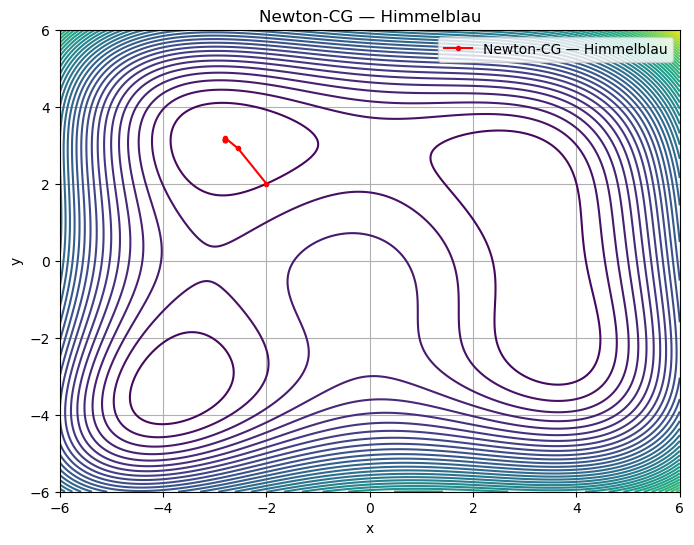

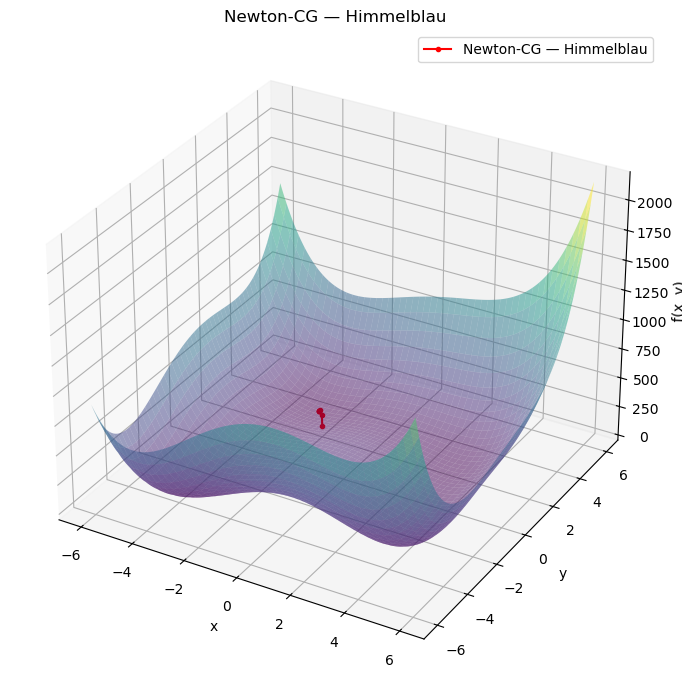

 Optimization terminated successfully.
         Current function value: 5.525612886499555e-19
         Iterations: 11
         Function evaluations: 14
         Time elapsed: 0.0021 sec
BFGS: x' = [-2.80511809  3.13131252], f(x') = 5.525612886499555e-19, iterations = 11


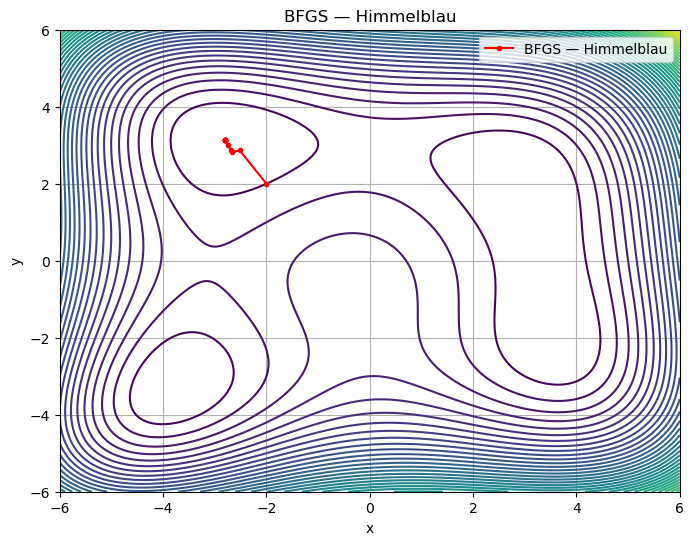

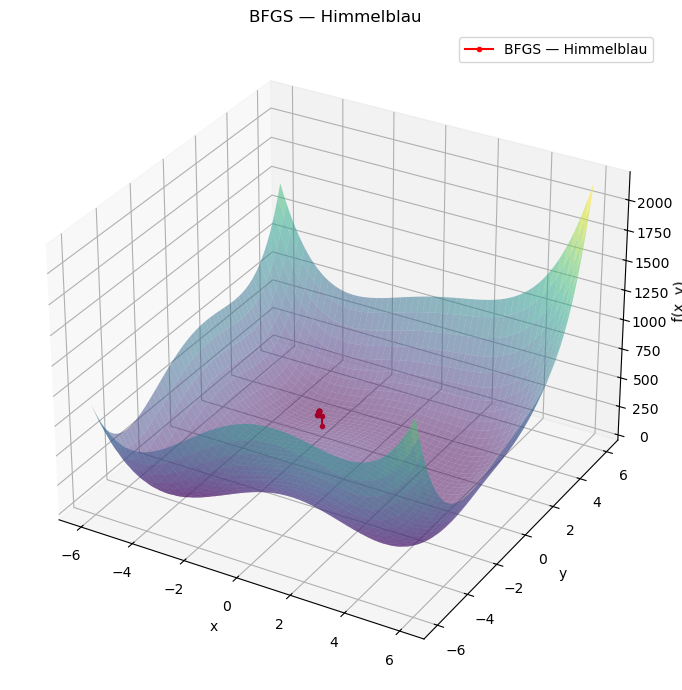

 Optimization terminated successfully.
         Current function value: 9.157460280628115e-17
         Iterations: 7
         Function evaluations: 9
         Time elapsed: 0.0006 sec
L-BFGS-B: x' = [-2.80511809  3.13131252], f(x') = 9.157460280628115e-17, iterations = 7


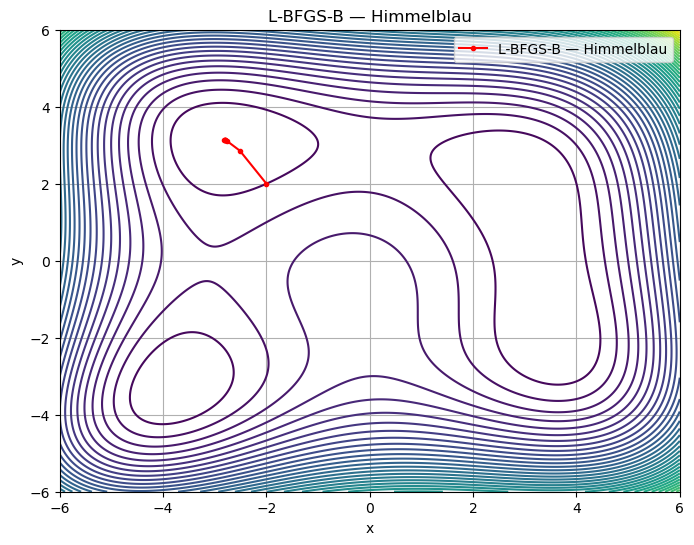

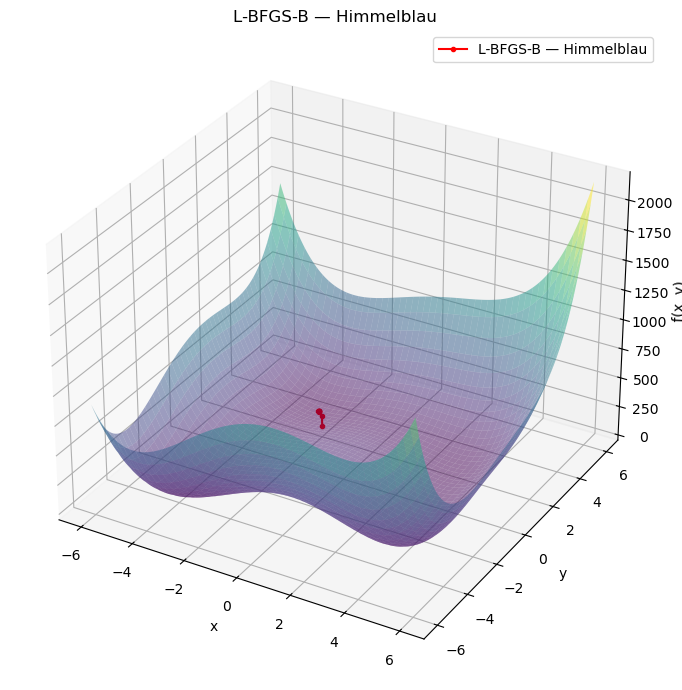

In [8]:
run_newton_cg(himmelblau, grad_himmelblau, x0=[-2.0, 2.0], func_label="Himmelblau")
run_bfgs(himmelblau, grad_himmelblau, x0=[-2.0, 2.0], func_label="Himmelblau")
run_lbfgsb(himmelblau, grad_himmelblau, x0=[-2.0, 2.0], func_label="Himmelblau")

---

### Результаты экспериментов (таблица сравнения)

| Метод / Функция | Минимум x                    | f(x)             | Итерации | Вызовов f | Время (сек) |
|----------------|------------------------------|------------------|----------|------------|--------------|
| **Himmelblau** |                              |                  |          |            |              |
| Newton-CG      | [-2.8051, 3.1313]            | 2.31e-18         | 6        | 8          | 0.0020       |
| BFGS           | [-2.8051, 3.1313]            | 5.52e-19         | 11       | 14         | 0.0021       |
| L-BFGS-B       | [-2.8051, 3.1313]            | 9.16e-17         | 7        | 9          | 0.0006       |
| **Quadratic**  |                              |                  |          |            |              |
| Newton-CG      | [0.0, 0.0]                   | 0.0              | 2        | 2          | 0.0006       |
| BFGS           | [0.0, 0.0]                   | 0.0              | 3        | 4          | 0.0007       |
| L-BFGS-B       | [6.2e-15, 6.2e-15]           | 7.7e-29          | 2        | 3          | 0.0003       |
| **Rosenbrock** |                              |                  |          |            |              |
| Newton-CG      | [0.99999991, 0.99999982]     | 8.51e-15         | 277      | 300        | 0.0416       |
| BFGS           | [1.0, 1.0]                   | ~0.0 (нет данных)| —        | —          | —            |
| L-BFGS-B       | [1.0, 0.99999999]            | 1.21e-17         | 39       | 53         | 0.0014       |

---

### Выводы

- Метод BFGS показал отличную сходимость на всех задачах, при этом не требует гессиана.
- Newton-CG эффективен при наличии аналитического градиента и хорошо подобранных параметров, но может быть затратен по итерациям.
- L-BFGS-B аналогичен по качеству BFGS, но показывает наименьшее время выполнения.
- На функции Himmelblau все методы сходятся в одну точку, но с разной скоростью.
- На Rosenbrock метод Newton-CG потребовал много итераций, но дал хороший результат.
- Quadratic — тривиальный случай, все методы справляются отлично.
